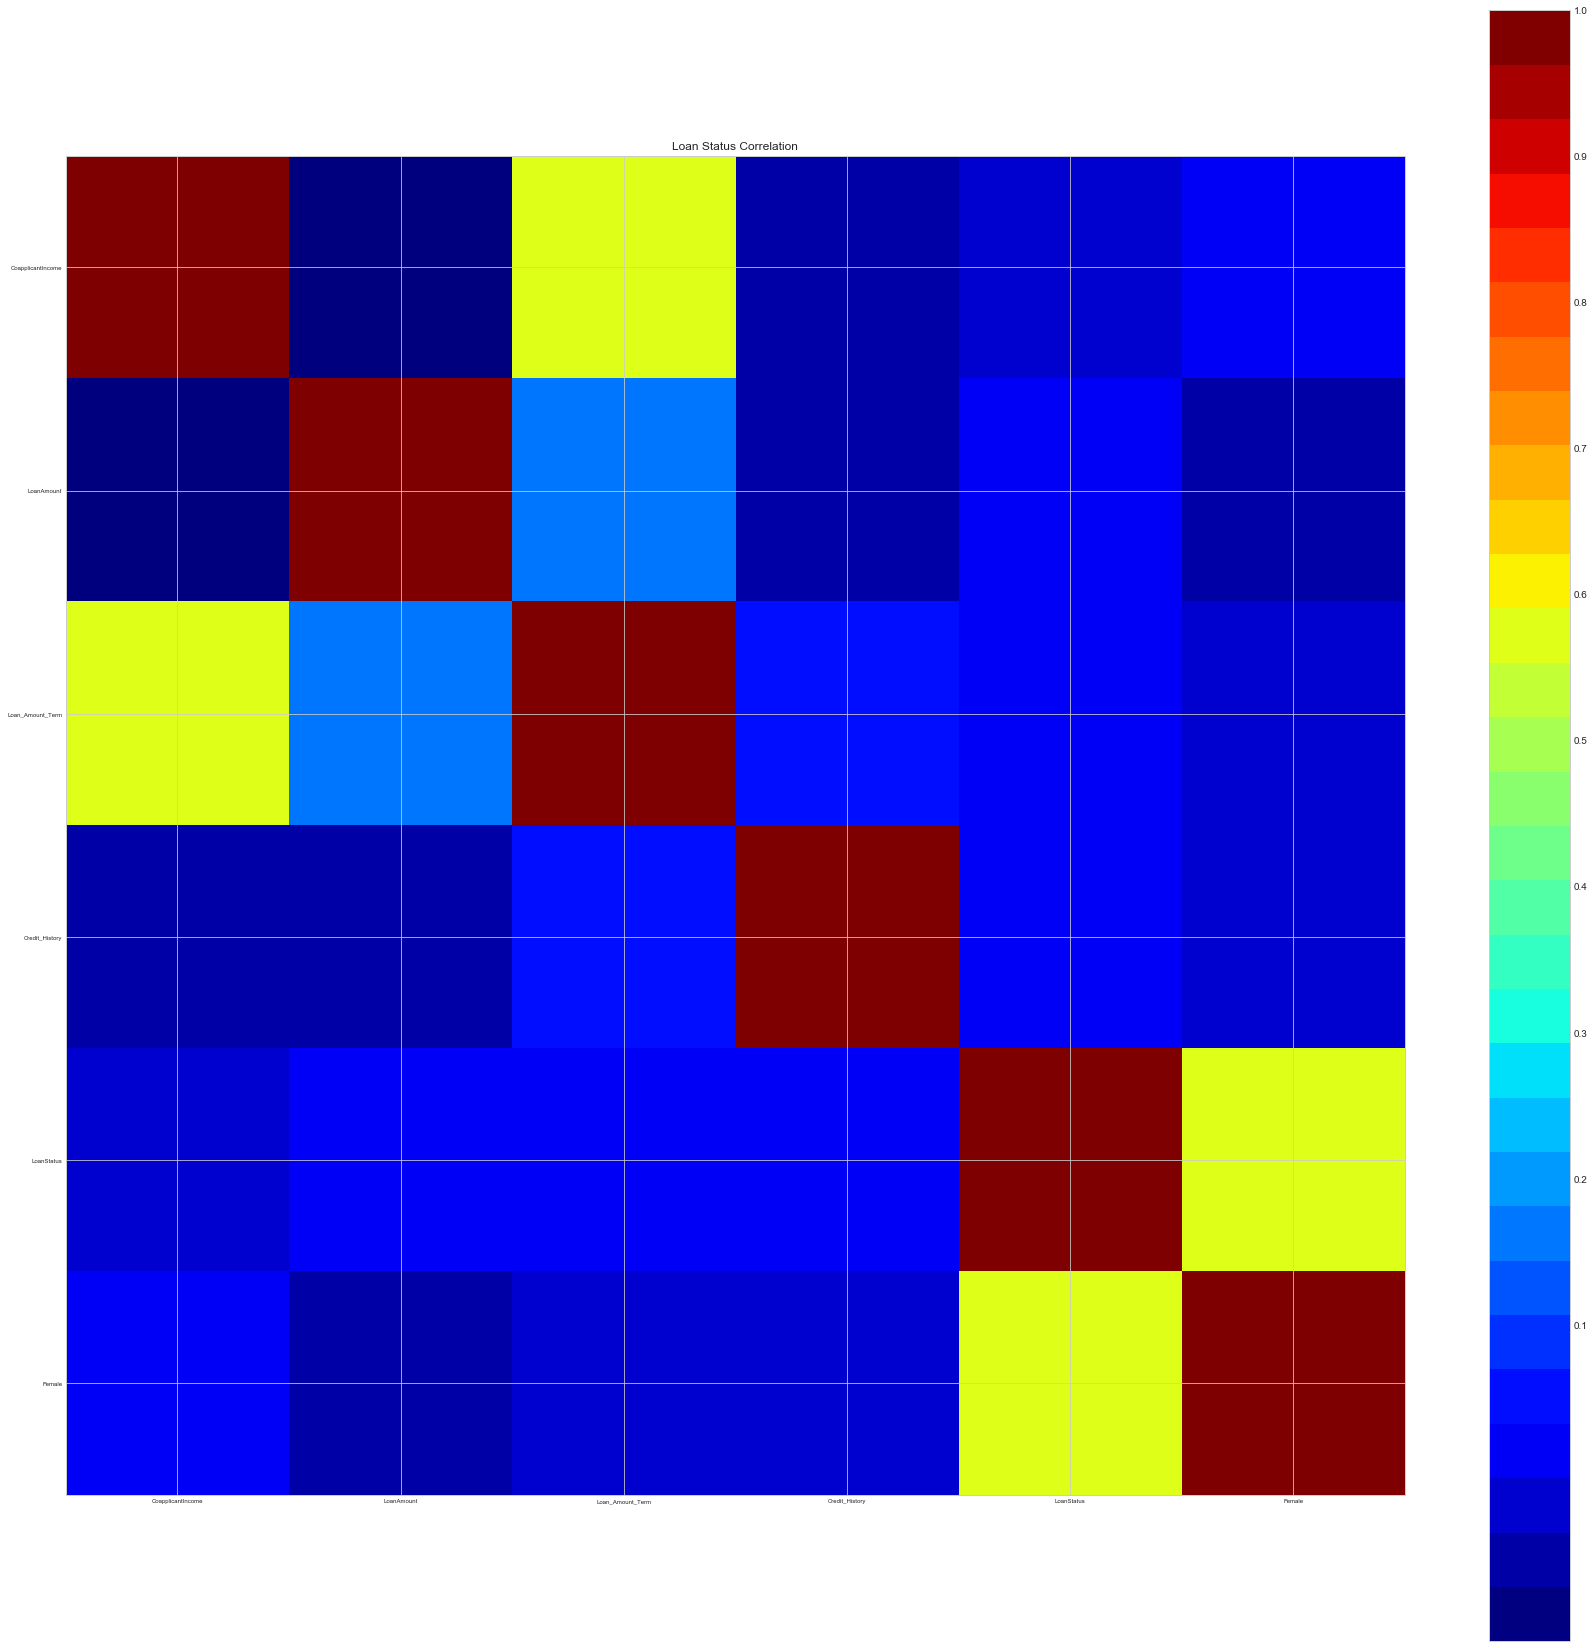

In [8]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

#Read the Data
df = pd.read_csv(open('Train Data CSV File Path','rb'))
#df = pd.read_csv(open('Test Data CSV File Path','rb'))
df.head()

#Loan_Status cleaning
def Loan_Status_Check(x):
    if x != 'N':
        return 1
    else:
        return 0
    
#Add the new LoanStatus Field to the DF
df['LoanStatus'] = df['Loan_Status'].apply(Loan_Status_Check)

#Clean-up category features
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'] = df['Dependents'].replace('3+',3)


#Create dummy features - Gender, Married, dependents, Employeed, property, education
gen_dummies = pd.get_dummies(df['Gender'])
mar_dummies = pd.get_dummies(df['Married'])
dep_dummies = pd.get_dummies(df['Dependents'])
emp_dummies = pd.get_dummies(df['Self_Employed'])
pro_dummies = pd.get_dummies(df['Property_Area'])
edu_dummies = pd.get_dummies(df['Education'])


#Rename the dummy columns
gen_dummies.columns = ['Female','Male']
mar_dummies.columns = ['Single','Married']
dep_dummies.columns = ['Dep3','Dep0','Dep1','Dep2']
emp_dummies.columns = ['NotSelfEmp','SelfEmp']
pro_dummies.columns = ['Prop_Rural','Prop_SemiU','Prop_Urban']
edu_dummies.columns = ['Grad','NotGrad']

#Concat dummies to form a DataFrame
dummies = pd.concat([gen_dummies, edu_dummies, mar_dummies, dep_dummies, emp_dummies, pro_dummies], axis=1)


# Mean Loan Amount percentage(mlap), based on total income
# Loan_Amount/(Sum(ApplicantIncome + CoapplicantIncome))
mlap = pd.DataFrame({'MLAP':df['LoanAmount']/(df['ApplicantIncome'] + df['CoapplicantIncome'])})

#Mean MLAP
meanMLAP = mlap['MLAP'].mean()

#Update the null LoanAmount with the following values
df['LoanAmount'].fillna(meanMLAP*(df['ApplicantIncome'] + df['CoapplicantIncome']), inplace=True)
df['LoanAmount'] = df['LoanAmount'].round()

# Correlation Matrix
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(30,30))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Loan Status Correlation')
    labels=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','LoanStatus',
            'Female','Male','Grad','NotGrad','Single', 'Married','Dep3','Dep0','Dep1','Dep2','NotSelfEmp','SelfEmp',
            'Prop_Rural','Prop_SemiU','Prop_Urban',]

    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
    plt.show()

correlation_matrix(df)

#Fill the NULL Credit_History
df.loc[(pd.isnull(df['Credit_History'])) & (df['LoanStatus'] == 1), 'Credit_History'] = int(1)
df.loc[(pd.isnull(df['Credit_History'])) & (df['LoanStatus'] == 0), 'Credit_History'] = int(0)

#Drop features from the DataFrame
df = df.drop(['Gender','Education','Married','Dependents','Self_Employed','Property_Area', 'Loan_Status'],axis=1)

#Add dummies features to the DataFrame
df = pd.concat([df,dummies], axis=1)
df.head()

# import os to find the working directory
import os
os.getcwd()

# Download the file to the local drive to check
df.to_csv('test_cleaned.csv')

#Find correlation, drop Dep0 and Prop_Rural for multicollinearity
X1 = df.drop(['Loan_ID'], axis=1)
X1.corr().to_csv('correclation1.csv')


In [4]:
#Define X for the Logistics Regression
X = df.drop(['Loan_ID','LoanStatus','Dep0','Prop_Rural'], axis=1)
X.head()

#Define Y for the Logistic Regression
Y = df.LoanStatus
Y.head()

# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.8306188925081434

In [ ]:
#Define X for the predicting the Loan Status using the Logistics Regression for the Test Data
X = df.drop(['Loan_ID','LoanStatus','Dep0','Prop_Rural'], axis=1)
X.head()

# Predict the classes of the testing data set ... Remember to use the correct data file and not run the above cell({4})
class_predict = log_model.predict(X)

In [ ]:
#The predicted Loan Status Values can be stored in a list
myResults = class_predict.tolist()